In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [85]:
!pip install pandas
!pip install seaborn
!pip install -U scikit-learn



In [86]:
# !pip install imblearn
!pip install -U imbalanced-learn

In [87]:
data = pd.read_csv('Loan_Data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [88]:
data.shape, data.dtypes

((614, 13),
 Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object)

In [89]:
data.columns = [col.lower().replace(" ","_") for col in data.columns]
data

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [90]:
data.isna().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [91]:
data = data.dropna ()

In [92]:
for column in data.columns:
    print(data[column].value_counts())

LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: loan_id, Length: 480, dtype: int64
Male      394
Female     86
Name: gender, dtype: int64
Yes    311
No     169
Name: married, dtype: int64
0     274
2      85
1      80
3+     41
Name: dependents, dtype: int64
Graduate        383
Not Graduate     97
Name: education, dtype: int64
No     414
Yes     66
Name: self_employed, dtype: int64
2500    7
4583    6
2600    5
6000    4
4166    4
       ..
3418    1
3975    1
3244    1
4408    1
7583    1
Name: applicantincome, Length: 405, dtype: int64
0.0       216
1666.0      5
2500.0      4
5625.0      3
2083.0      3
         ... 
1250.0      1
3021.0      1
983.0       1
1775.0      1
240.0       1
Name: coapplicantincome, Length: 232, dtype: int64
120.0    13
100.0    13
110.0    13
187.0    12
128.0     9
         ..
280.0     1
240.0     1
214.0     1
59.0      1
253.0     1
Name: l

In [93]:
numericals = data.select_dtypes('number')
numericals

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
5,5417,4196.0,267.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [94]:
categoricals =data.select_dtypes('object')
categoricals

,loan_id,gender,married,dependents,education,self_employed,property_area,loan_status
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [95]:
for col in data.select_dtypes('object'):
    print(data[col].value_counts(), '\n')

LP001003    1
LP001005    1
LP002347    1
LP002345    1
LP002342    1
           ..
LP001674    1
LP001673    1
LP001666    1
LP001665    1
LP002990    1
Name: loan_id, Length: 480, dtype: int64 

Male      394
Female     86
Name: gender, dtype: int64 

Yes    311
No     169
Name: married, dtype: int64 

0     274
2      85
1      80
3+     41
Name: dependents, dtype: int64 

Graduate        383
Not Graduate     97
Name: education, dtype: int64 

No     414
Yes     66
Name: self_employed, dtype: int64 

Semiurban    191
Urban        150
Rural        139
Name: property_area, dtype: int64 

Y    332
N    148
Name: loan_status, dtype: int64 



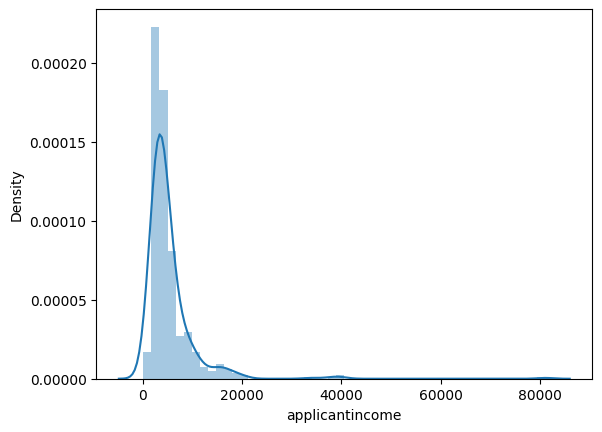

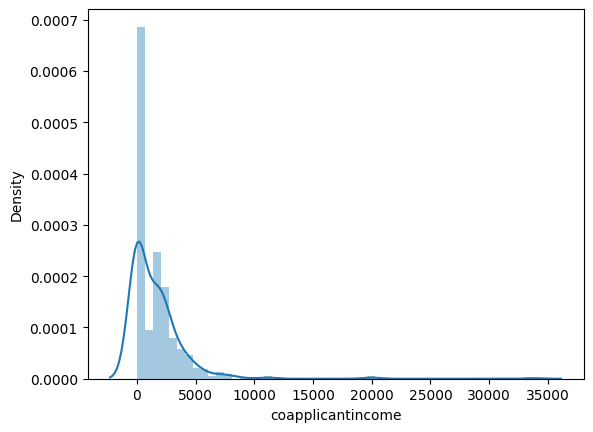

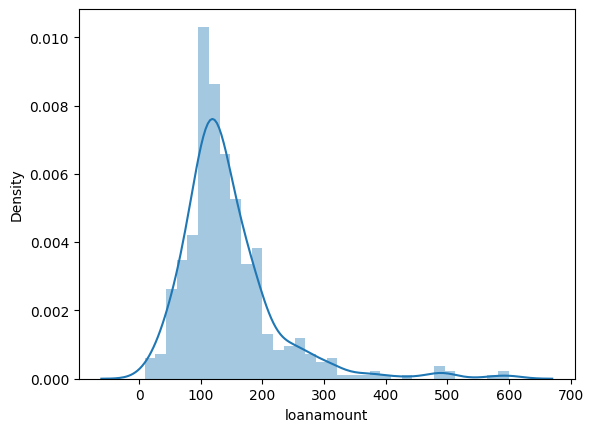

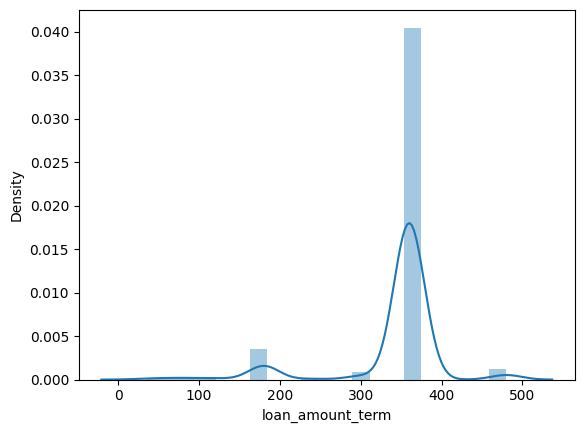

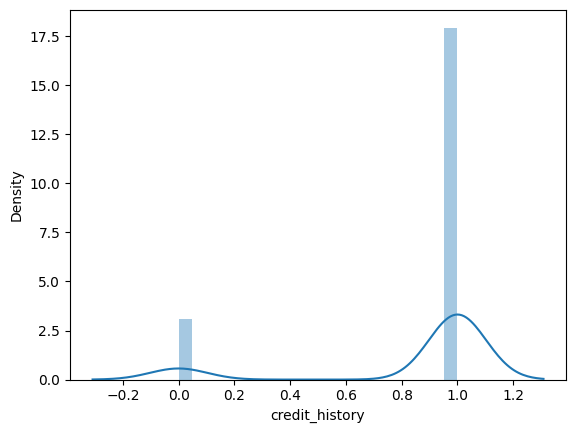

In [96]:
for i in data.select_dtypes('number').columns:
    sns.distplot(data[i])
    plt.show()

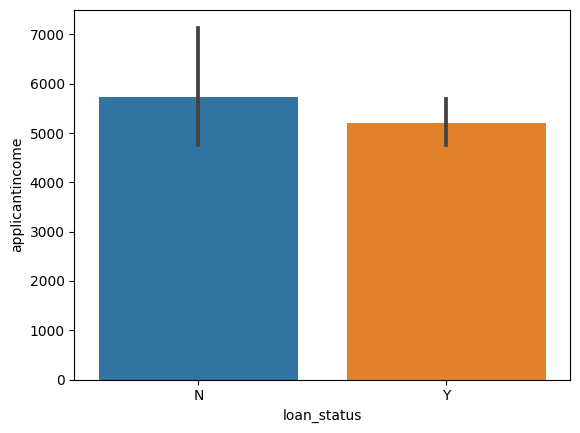

In [97]:
sns.barplot(y="applicantincome", x="loan_status", data=data)
plt.show()

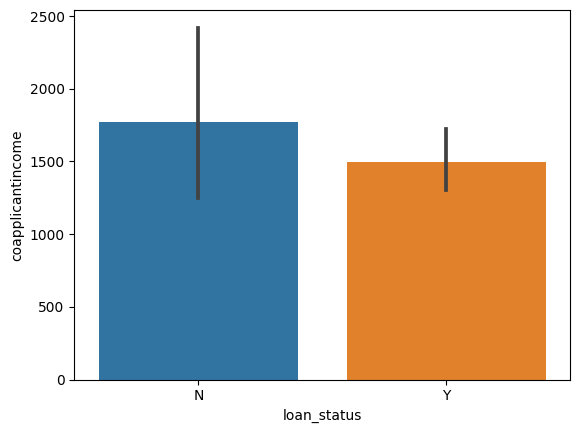

In [98]:
sns.barplot(y="coapplicantincome", x="loan_status", data=data)
plt.show()

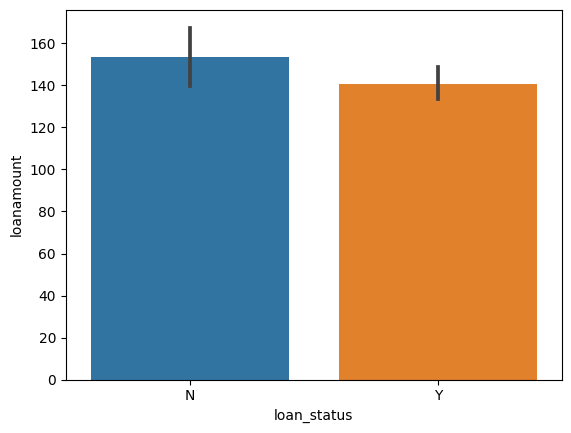

In [99]:
sns.barplot(y="loanamount", x="loan_status", data=data)
plt.show()

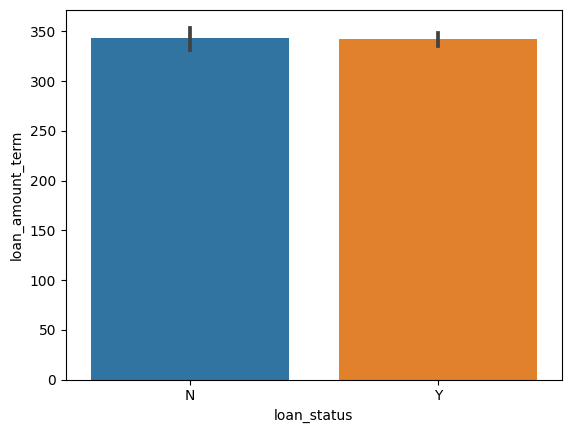

In [100]:
sns.barplot(y="loan_amount_term", x="loan_status", data=data)
plt.show()

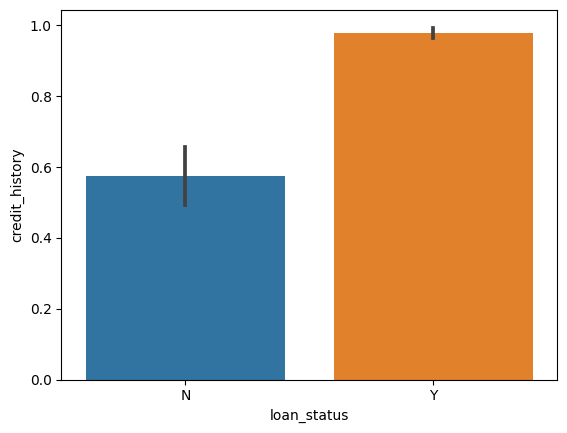

In [101]:
sns.barplot(y="credit_history", x="loan_status", data=data)
plt.show()

In [102]:
data_crosstab = pd.crosstab(data['gender'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status    N    Y
gender               
Female        32   54
Male         116  278


In [103]:
data_crosstab = pd.crosstab(data['married'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status   N    Y
married             
No           64  105
Yes          84  227


In [104]:
data_crosstab = pd.crosstab(data['education'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status     N    Y
education             
Graduate      112  271
Not Graduate   36   61


In [105]:
data_crosstab = pd.crosstab(data['self_employed'],
                            data['loan_status'], 
                               margins = False)
data_crosstab

loan_status,N,Y
self_employed,,
No,125,289
Yes,23,43


In [106]:
data_crosstab = pd.crosstab(data['property_area'],
                            data['loan_status'], 
                               margins = False)
print(data_crosstab)

loan_status     N    Y
property_area         
Rural          54   85
Semiurban      42  149
Urban          52   98


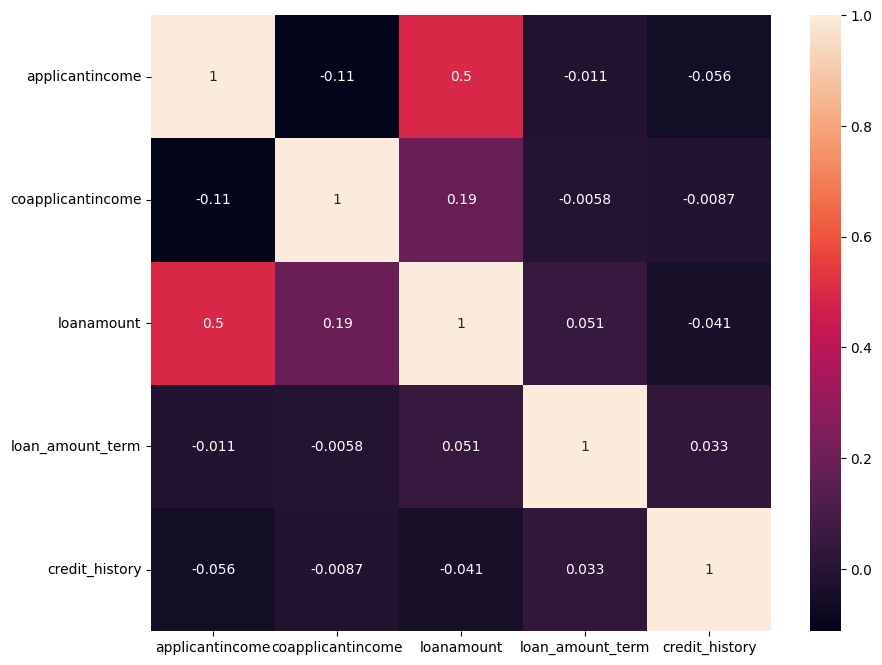

In [107]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [108]:
y = data['loan_status']
# X = data.drop('loan_status', axis=1)
# X = data.drop('loan_id', axis=1)
# X = data.drop('dependents', axis=1)
X = data.drop(['loan_status', 'loan_id'], axis = 1)

In [109]:
X = pd.get_dummies(X, columns=['gender', 'married', 'education', 'self_employed', 'property_area', 'dependents'])
X

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,gender_Female,gender_Male,married_No,married_Yes,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,property_area_Rural,property_area_Semiurban,property_area_Urban,dependents_0,dependents_1,dependents_2,dependents_3+
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
610,4106,0.0,40.0,180.0,1.0,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
611,8072,240.0,253.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,1,0,0
612,7583,0.0,187.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
#handling imbalanced dataset UnderSampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [112]:
# #handling imbalanced dataset Oversampling
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=0)
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [113]:
# #handling imbalanced dataset SMOT
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=0)
# X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [114]:
# #fitting into Logistic Regression using imbalanced dataset handling techniques
classification = LogisticRegression(random_state=42) #, max_iter=1000

classification.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [64]:
# fitting into Logistic Regression without imbalanced dataset handling techniques
# classification = LogisticRegression(random_state=42) #, max_iter=1000

# classification.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [115]:
classification.score(X_test, y_test)

0.7916666666666666

In [116]:
predictions = classification.predict(X_test)
predictions

array(['N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [117]:
confusion_matrix(y_test, predictions, labels = ['N', 'Y'])

array([[19,  9],
       [11, 57]], dtype=int64)

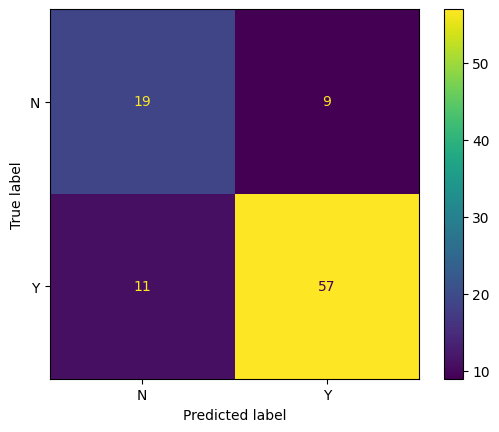

In [118]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, predictions, labels = ['N', 'Y']), display_labels = ["N", "Y"])

cm_display.plot()
plt.show()

In [ ]:
#findings
# original dataset is biased with 70% loan_status as Y
# tried undersampling and oversampling techniques to minimize biased sampling 
# Using data set as is vs. under and oversampling techniques predicts 
    # more true positive and false positive 
    # less true negative and false negative 
# Trade off has to be made based on business requirements, Eg whether predicting a false positive i.e someone who would default being predicted as non-defaulter is riskier than predicting fasle negative i.e someone who would not default being predicted as defaulter. Risk and gains associated with each quadrant needs to be assessed before recommneding a model

In [61]:
# Accuracy measures how often the model is correct. (True Positive + True Negative) / Total Predictions
Accuracy = metrics.accuracy_score(y_test, predictions)
Accuracy

0.8125

In [ ]:
# Of the positives predicted, what percentage is truly positive? True Positive / (True Positive + False Positive)
Precision = metrics.precision_score(y_test, predictions)
# print(y_test)
# print(predictions)